In [4]:
import pandas as pd
import numpy as np
import lequi
from netCDF4 import Dataset
import mean_net
import seaborn as sns
from shapely.geometry import Point, Polygon

In [7]:
ISOTOPO = '15N'
n = 10
names_bio = ['bio1','bio2','bio3','bio4','bio5','bio6','bio7','bio8','bio9','bio10','bio11','bio12','bio13','bio14','bio15','bio16','bio17','bio18','bio19']

In [8]:
def call_var(name, n):
    dataset = Dataset('C:/Users/bmati/Desktop/proyecto296/training/data/biocliamtic_CR2_1979_2016/'+name+'.nc', mode="r")
    z = dataset.variables[name][:]
    grid_lat = dataset.variables['lat'][:]
    grid_lon = dataset.variables['lon'][:]
    dataset.close()
    return z[-n:], grid_lat, grid_lon

def significance(pvalue):
    if pvalue < 0.001:
        return ' ***'
    elif pvalue < 0.01:
        return ' **'
    elif pvalue < 0.05:
        return ' *'
    else:
        return ' '

In [9]:
df_poligon = pd.read_csv('data/cuencas_poligonos.csv')
atacama_poli = list(eval(df_poligon['Atacama'][0]))

poligon = Polygon(atacama_poli)

In [10]:
data = pd.read_csv("data/suelosAllAC.csv")
lon = np.array(data["lon"])
lat = np.array(data["lat"])
iso = np.array(data[ISOTOPO])
lon, lat, iso = lequi.csv(lon),lequi.csv(lat),lequi.csv(iso)
       
bio_layers = {}
for name in names_bio:
    layer, grid_lat, grid_lon = call_var(name, n)
    col = mean_net.returnDat(lat,lon,grid_lat,grid_lon,np.nanmean(layer, axis=0))
    bio_layers[name] = col

bio_layers['Latitude'] = lat
bio_layers['Longitude'] = lon
bio_layers[ISOTOPO] = iso

df = pd.DataFrame(bio_layers)


<ipython-input-8-af489edd05de>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  z = dataset.variables[name][:]
<ipython-input-8-af489edd05de>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  grid_lat = dataset.variables['lat'][:]
<ipython-input-8-af489edd05de>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence

0      13.55
1       2.92
2      12.88
3       6.38
4      -1.04
       ...  
101     4.16
102     5.09
103     6.32
104     3.06
105     5.08
Name: 15N, Length: 106, dtype: float64


(array([0.01623187, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01623187, 0.        , 0.01623187, 0.        ,
        0.01623187, 0.        , 0.09739121, 0.08115935, 0.04869561,
        0.04869561, 0.11362308, 0.17855056, 0.12985495, 0.14608682,
        0.06492748, 0.12985495, 0.03246374, 0.14608682, 0.11362308,
        0.06492748, 0.06492748, 0.06492748, 0.01623187, 0.01623187,
        0.01623187, 0.        , 0.03246374, 0.        , 0.01623187,
        0.01623187, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01623187]),
 array([-10.03  ,  -9.4488,  -8.8676,  -8.2864,  -7.7052,  -7.124 ,
         -6.5428,  -5.9616,  -5.3804,  -4.7992,  -4.218 ,  -3.6368,
         -3.0556,  -2.4744,  -1.8932,  -1.312 ,  -0.7308,  -0.1496,
          0.4316,   1.0128,   1.594 ,   2.1752,   2.7564,   3.3376,
          3.9188,   4.5   ,   5.0812,   5.6624

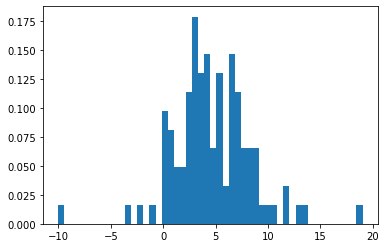

In [12]:
import matplotlib.pyplot as plt


plt.hist(df['15N'], bins=50, density=True)
#plt.xlim(rigth=-18)

In [16]:
for i in list(df['15N']):
    if i > 15 or i<-5:
        print(i)

19.03
-10.03


In [23]:
dff = df[df['13C']<=-18]
dff

,bio1,bio2,bio3,bio4,bio5,bio6,bio7,bio8,bio9,bio10,...,bio13,bio14,bio15,bio16,bio17,bio18,bio19,Latitude,Longitude,13C
0,6.781648,15.527605,64.495400,315.088335,18.892970,-5.208931,24.101900,7.670747,5.421298,10.601182,...,19.178000,0.0,123.336154,23.854,0.055,13.199,5.231000,-23.62620,-67.83494,-21.40
1,9.512859,15.834781,65.535805,301.691065,21.585223,-2.604458,24.189681,10.048056,10.776731,13.103045,...,15.870000,0.0,116.141936,18.094,0.007,7.618,3.642000,-23.61002,-67.87349,-23.21
2,6.781648,15.527605,64.495400,315.088335,18.892970,-5.208931,24.101900,7.670747,5.421298,10.601182,...,19.178000,0.0,123.336154,23.854,0.055,13.199,5.231000,-23.62620,-67.83494,-22.91
3,17.292080,7.011714,49.380242,201.289604,25.103611,10.860042,14.243569,18.758515,19.791519,20.085420,...,3.282000,0.0,34.821223,3.308,0.000,2.485,1.177000,-23.50000,-70.54000,-25.43
4,6.781648,15.527605,64.495400,315.088335,18.892970,-5.208931,24.101900,7.670747,5.421298,10.601182,...,19.178000,0.0,123.336154,23.854,0.055,13.199,5.231000,-23.62620,-67.83494,-22.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,14.121252,13.251624,56.089936,355.066326,26.990337,3.313603,23.676734,9.829689,17.174319,18.535722,...,77.945000,0.0,171.600108,124.437,0.000,2.510,104.466999,-31.36360,-71.10480,-27.62
163,14.781758,14.284080,57.344513,352.678578,28.363834,3.405418,24.958416,10.496199,18.252404,19.212604,...,86.294001,0.0,165.229213,144.814,0.000,2.300,124.524000,-31.87777,-71.15838,-26.78
164,14.781758,14.284080,57.344513,352.678578,28.363834,3.405418,24.958416,10.496199,18.252404,19.212604,...,86.294001,0.0,165.229213,144.814,0.000,2.300,124.524000,-31.87777,-71.15838,-27.75
165,14.781758,14.284080,57.344513,352.678578,28.363834,3.405418,24.958416,10.496199,18.252404,19.212604,...,86.294001,0.0,165.229213,144.814,0.000,2.300,124.524000,-31.87777,-71.15838,-28.47


In [24]:
dff.to_csv('data/training_13C_plantas_del_c4.csv', index=False)

In [44]:
def select_poligon(df, poligon):
    list_index = []
    for i in range(0, len(df['Latitude'])):
        point = Point((df['Longitude'][i],df['Latitude'][i]))
        if poligon.contains(point):
            list_index.append(i)
    df = df.filter(items = list_index, axis=0)
    return df

In [45]:
df = select_poligon(df, poligon)

df
        

,bio1,bio2,bio3,bio4,bio5,bio6,bio7,bio8,bio9,bio10,...,bio13,bio14,bio15,bio16,bio17,bio18,bio19,Latitude,Longitude,15N
0,16.680066,19.940985,73.603150,222.898539,30.221051,3.088484,27.132568,17.506520,18.646753,19.269062,...,4.613000,0.0,60.611061,4.751000,0.000,0.000,3.476,-22.85000,-69.26000,13.550000
1,13.945570,16.422479,66.199236,302.465765,26.373077,1.530497,24.842580,13.844643,15.541803,17.465280,...,8.833000,0.0,101.518006,9.362000,0.000,2.718,3.804,-23.52000,-67.97000,2.920000
2,17.292080,7.011714,49.380242,201.289604,25.103611,10.860042,14.243569,18.758515,19.791519,20.085420,...,3.282000,0.0,34.821223,3.308000,0.000,2.485,1.177,-23.50000,-70.54000,12.880000
11,2.766039,16.247809,64.309459,358.207427,15.801398,-9.492917,25.294315,6.312037,1.447424,7.252242,...,25.216000,0.0,145.052358,38.314000,0.026,38.237,2.188,-23.87000,-67.54000,0.160000
16,16.680066,19.940985,73.603150,222.898539,30.221051,3.088484,27.132568,17.506520,18.646753,19.269062,...,4.613000,0.0,60.611061,4.751000,0.000,0.000,3.476,-22.85000,-69.26000,0.260000
17,4.321225,16.290742,62.889864,365.208121,17.525332,-8.388980,25.914312,7.927571,3.091403,8.874206,...,24.130000,0.0,144.302800,37.405000,0.029,37.305,2.440,-23.93000,-67.64000,1.960000
18,16.570421,19.136992,74.519030,186.025096,29.067436,3.320694,25.746742,17.337191,18.429607,18.689301,...,3.056000,0.0,40.367459,3.056000,0.000,0.000,1.202,-23.38000,-69.93000,-3.380000
20,14.345527,17.846911,72.345399,206.075585,26.803798,2.072394,24.731403,13.514646,16.110359,16.751326,...,5.012000,0.0,69.838221,5.152000,0.000,0.000,4.351,-22.70000,-69.19000,5.410000
23,14.223703,17.474720,67.263741,281.890006,27.350697,1.319005,26.031692,14.316060,15.677291,17.366443,...,2.675000,0.0,51.486246,2.864000,0.000,0.468,2.013,-22.87000,-68.30000,0.230000
24,17.538451,14.836716,69.490525,197.164798,28.133817,6.679391,21.454426,18.272564,19.729076,20.001059,...,2.303000,0.0,32.517814,2.303000,0.000,1.658,0.733,-22.09000,-70.16000,8.990000
